# Preface
My occupation is wizard: I wave my magic wand and shit happens. 
> We are about to talk about study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.

One of the factions in Hogwarts pushes the agenda of embracing computational process that emulates human brain and saught to obtain the oracle of solving complex problems which other factions struggled to solve. The protagonist faction in this book calls themselves Connectionists, and this is the story of connectionsm.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

# source file mlp.py
import mlp

## Multi-layer perceptrons

- 3 layer architecture
- feed forward
- backpropagate for gradient descent
- update _once_ every epoch, not during sample loop
- training testing split, testing set untouchable
- mini batch gradient descent for hand-written letter (stochastic, because randomly select training sample every epoch)
- ensemble at the end (extra experiment)

code is in the **mlp.py** file. 

## About this notebook

- XOR experiment with 2D visualisation based on spatial boundary plot using trained result
- Sine experiment with 2D visualisation based on scatter plot comparing target and predictions, SSE showed (no residual analysis)
- Hand written letter prediction experiments with accuracy plots on different number of hidden units, mini-batch size etc.
- Ensemble for hand written letter

In [2]:
xor_X,xor_y = mlp.get_Xor_data()

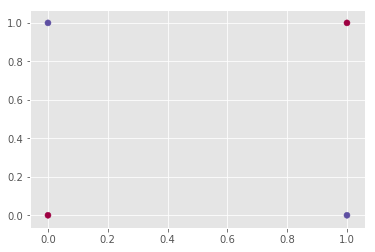

In [3]:
plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

In [4]:
# 2 hidden unit MLP for XOR demonstration
xor_mlp_2 = mlp.MLP(xor_X, xor_y, 2)

In [5]:
_,losslog =xor_mlp_2.train(print_loss=True)

Data loss (cross entropy) after epoch 0: 0.6861598242933123
Data loss (cross entropy) after epoch 2000: 0.5028045648406304
Data loss (cross entropy) after epoch 4000: 0.47885248960886223
Data loss (cross entropy) after epoch 6000: 0.030596319443061397
Data loss (cross entropy) after epoch 8000: 0.01276464407179478
Data loss (cross entropy) after epoch 10000: 0.007943765071568003
Data loss (cross entropy) after epoch 12000: 0.0057369928379645725
Data loss (cross entropy) after epoch 14000: 0.004479064073832102
Data loss (cross entropy) after epoch 16000: 0.0036686582180509436
Data loss (cross entropy) after epoch 18000: 0.0031039719089720206
Data loss (cross entropy) after epoch 20000: 0.0026884077996359853
Data loss (cross entropy) after epoch 22000: 0.0023700195106840447
Data loss (cross entropy) after epoch 24000: 0.002118422822539804
Data loss (cross entropy) after epoch 26000: 0.0019146763676030475
Data loss (cross entropy) after epoch 28000: 0.0017463663143026439
Data loss (cross 

Data loss (cross entropy) after epoch 244000: 0.00016289700072488192
Data loss (cross entropy) after epoch 246000: 0.0001615306040256609
Data loss (cross entropy) after epoch 248000: 0.00016018685432779453


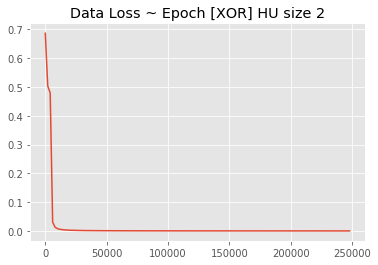

In [6]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Data Loss ~ Epoch [XOR] HU size {0}".format(2))

In [7]:
def plot_xor_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = xor_X[:, 0].min() - .5, xor_X[:, 0].max() + .5
    y_min, y_max = xor_X[:, 1].min() - .5, xor_X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

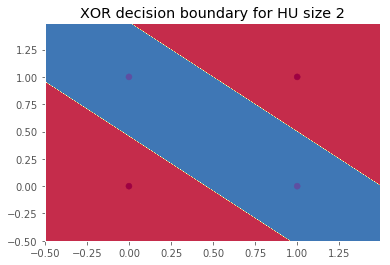

In [8]:
plot_xor_decision_boundary(lambda x: xor_mlp_2.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(2))

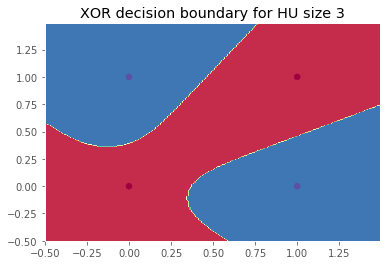

In [9]:
xor_mlp_3 = mlp.MLP(xor_X, xor_y, 3)
xor_mlp_3.train()
plot_xor_decision_boundary(lambda x: xor_mlp_3.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(3))

## sine experiment

X = [...] of shape (50,4)


$y_i = sin(\sum_j{x_{i,j}})$



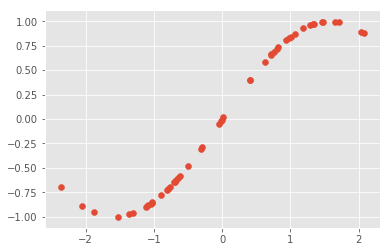

In [10]:
x,y = mlp.get_Sine_data()
trainingX, trainingy,testingX,testingy = mlp.get_data_split(x,y,0.8)
sine_hu_size = 5
sine_mlp = mlp.MLP(X=trainingX, y=trainingy, hu_size=sine_hu_size)

plt.scatter(x[:,0]+x[:,1]+x[:,2]+x[:,3],y)

In [11]:
acclog, losslog = sine_mlp.train(print_loss=True, testset_X=testingX, testset_y=testingy, classification=False)

Error (SSE) after epoch 0: [ 4.46174999]
Error (SSE) after epoch 2000: [ 0.03929822]
Error (SSE) after epoch 4000: [ 0.03342673]
Error (SSE) after epoch 6000: [ 0.03059426]
Error (SSE) after epoch 8000: [ 0.02861326]
Error (SSE) after epoch 10000: [ 0.02691947]
Error (SSE) after epoch 12000: [ 0.02545212]
Error (SSE) after epoch 14000: [ 0.02428472]
Error (SSE) after epoch 16000: [ 0.02341456]
Error (SSE) after epoch 18000: [ 0.02278468]
Error (SSE) after epoch 20000: [ 0.0223339]
Error (SSE) after epoch 22000: [ 0.02200501]
Error (SSE) after epoch 24000: [ 0.021752]
Error (SSE) after epoch 26000: [ 0.02154344]
Error (SSE) after epoch 28000: [ 0.02135969]
Error (SSE) after epoch 30000: [ 0.02118868]
Error (SSE) after epoch 32000: [ 0.02102284]
Error (SSE) after epoch 34000: [ 0.02085743]
Error (SSE) after epoch 36000: [ 0.02068983]
Error (SSE) after epoch 38000: [ 0.02051923]
Error (SSE) after epoch 40000: [ 0.02034615]
Error (SSE) after epoch 42000: [ 0.02017179]
Error (SSE) after epo

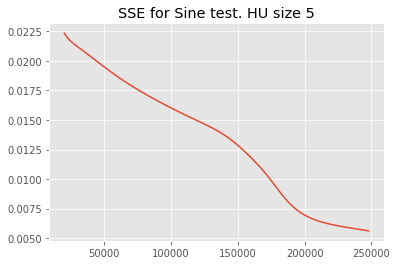

In [12]:
plt.plot([i[0] for i in losslog[10:]], [i[1] for i in losslog[10:]])
plt.title("SSE for Sine test. HU size {0}".format(sine_hu_size))

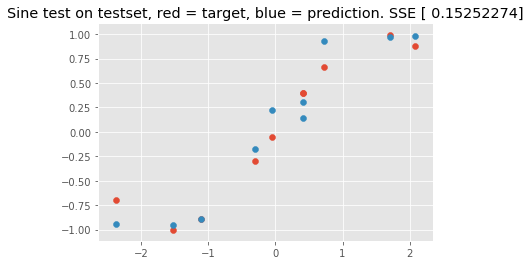

In [13]:
x = testingX
y = testingy
def linear_sine_components(x):
    return x[:,0] + x[:,1] + x[:,2] + x[:,3]
comb = linear_sine_components(x)
plt.scatter(comb,y)
# sine_mlp_10.predict(x,False)
y_hat = (sine_mlp.predict(x,False))['z2']
plt.scatter(comb,y_hat)
plt.title("Sine test on testset, red = target, blue = prediction. SSE {0}".
          format(0.5*np.sum(np.square(y_hat-y), axis=0)))


### Let's try again?

Error (SSE) after epoch 0: [ 4.46174999]
Error (SSE) after epoch 2000: [ 0.03929822]
Error (SSE) after epoch 4000: [ 0.03342673]
Error (SSE) after epoch 6000: [ 0.03059426]
Error (SSE) after epoch 8000: [ 0.02861326]
Error (SSE) after epoch 10000: [ 0.02691947]
Error (SSE) after epoch 12000: [ 0.02545212]
Error (SSE) after epoch 14000: [ 0.02428472]
Error (SSE) after epoch 16000: [ 0.02341456]
Error (SSE) after epoch 18000: [ 0.02278468]
Error (SSE) after epoch 20000: [ 0.0223339]
Error (SSE) after epoch 22000: [ 0.02200501]
Error (SSE) after epoch 24000: [ 0.021752]
Error (SSE) after epoch 26000: [ 0.02154344]
Error (SSE) after epoch 28000: [ 0.02135969]
Error (SSE) after epoch 30000: [ 0.02118868]
Error (SSE) after epoch 32000: [ 0.02102284]
Error (SSE) after epoch 34000: [ 0.02085743]
Error (SSE) after epoch 36000: [ 0.02068983]
Error (SSE) after epoch 38000: [ 0.02051923]
Error (SSE) after epoch 40000: [ 0.02034615]
Error (SSE) after epoch 42000: [ 0.02017179]
Error (SSE) after epo

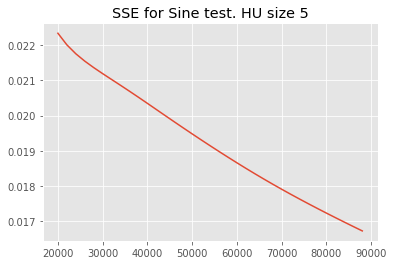

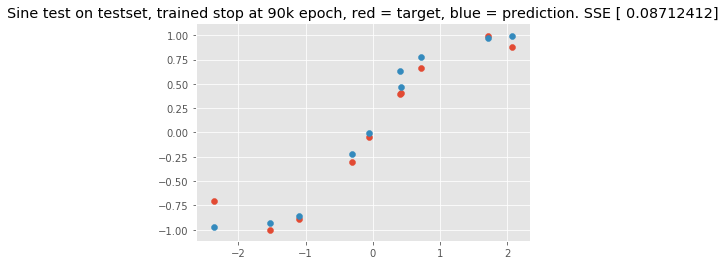

In [14]:
sine_hu_size = 5
sine_mlp = mlp.MLP(X=trainingX, y=trainingy, hu_size=sine_hu_size)
_,errorlog = sine_mlp.train(epoch=90000, print_loss=True
                            ,classification=False)
plt.plot([i[0] for i in errorlog[10:]], [i[1] for i in errorlog[10:]])
plt.title("SSE for Sine test. HU size {0}".format(sine_hu_size))
plt.show()
y_hat = (sine_mlp.predict(x,False))['z2']
plt.scatter(comb, y)
plt.scatter(comb, y_hat)
plt.title("Sine test on testset, trained stop at 90k epoch, red = target, blue = prediction. SSE {0}".
         format(0.5*np.sum(np.square(y_hat-y), axis=0)))

## Exceptional :)
- 16 attribute
- A-Z as classes
- 20000 samples
- 80% split (recommended)
- 10 hidden units (recommended)

In [15]:
import pandas as pd # only for csv reading, no other usage, i swear :)
dataset = pd.read_csv('letter-recognition.data',delimiter=',',header=None)
print("shape {0}".format(dataset.shape))
dataset.head()

shape (20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [16]:
hwl_X, hwl_y= mlp.get_Hwl_data()

In [17]:
training_X, training_y, testing_X, testing_y = mlp.get_data_split(hwl_X, hwl_y, 0.8)

In [18]:
training_X.shape[0]

16000

In [19]:
# recommended 10 hidden units
hwl_mlp_10 = mlp.MLP(training_X, training_y, 10)



# train using mini batch, batch size 16 (2^4 for cache friendliness, my laptop is poor)
acclog, losslog = hwl_mlp_10.train(batch_size=16, testset_X=testing_X, testset_y=testing_y, print_loss=True)

Data loss (cross entropy) after epoch 0: 3.2636384234828695
Accuracy after epoch 0: 0.0515
Data loss (cross entropy) after epoch 2000: 1.8085437518081362
Accuracy after epoch 2000: 0.43725
Data loss (cross entropy) after epoch 4000: 1.6193305764123282
Accuracy after epoch 4000: 0.502
Data loss (cross entropy) after epoch 6000: 1.6195335344644033
Accuracy after epoch 6000: 0.4895
Data loss (cross entropy) after epoch 8000: 1.3428428223514328
Accuracy after epoch 8000: 0.57725
Data loss (cross entropy) after epoch 10000: 1.4154296579431411
Accuracy after epoch 10000: 0.56425
Data loss (cross entropy) after epoch 12000: 1.3033583547966199
Accuracy after epoch 12000: 0.591
Data loss (cross entropy) after epoch 14000: 1.4654009717868879
Accuracy after epoch 14000: 0.55575
Data loss (cross entropy) after epoch 16000: 1.4257553126452152
Accuracy after epoch 16000: 0.551
Data loss (cross entropy) after epoch 18000: 1.337639992158094
Accuracy after epoch 18000: 0.58475
Data loss (cross entropy)

Data loss (cross entropy) after epoch 166000: 1.1927297393775333
Accuracy after epoch 166000: 0.62975
Data loss (cross entropy) after epoch 168000: 1.221076566179499
Accuracy after epoch 168000: 0.62775
Data loss (cross entropy) after epoch 170000: 1.2258865433375525
Accuracy after epoch 170000: 0.62425
Data loss (cross entropy) after epoch 172000: 1.2030021582324222
Accuracy after epoch 172000: 0.6315
Data loss (cross entropy) after epoch 174000: 1.1812067293942692
Accuracy after epoch 174000: 0.631
Data loss (cross entropy) after epoch 176000: 1.2383396424282096
Accuracy after epoch 176000: 0.61825
Data loss (cross entropy) after epoch 178000: 1.2317725263095243
Accuracy after epoch 178000: 0.6005
Data loss (cross entropy) after epoch 180000: 1.2457555500973407
Accuracy after epoch 180000: 0.5925
Data loss (cross entropy) after epoch 182000: 1.2096259035427535
Accuracy after epoch 182000: 0.63
Data loss (cross entropy) after epoch 184000: 1.2078412178779088
Accuracy after epoch 18400

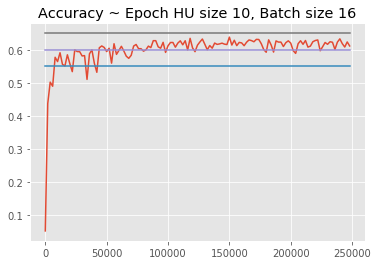

In [20]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.55)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(10,16))

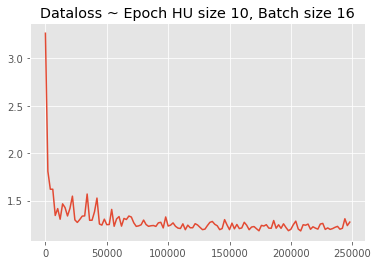

In [21]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(10,16))

In [22]:
# trying 16 hidden units. rests are same premises as 10 units run
hwl_mlp_16 = mlp.MLP(training_X, training_y, 16)

# data loss is calcuated on training set
# accuracy is calculated on testing set
acclog,_ = hwl_mlp_16.train(batch_size=16, testset_X=testing_X, testset_y=testing_y)

Accuracy after epoch 0: 0.04725
Accuracy after epoch 2000: 0.57575
Accuracy after epoch 4000: 0.529
Accuracy after epoch 6000: 0.63975
Accuracy after epoch 8000: 0.65675
Accuracy after epoch 10000: 0.623
Accuracy after epoch 12000: 0.66325
Accuracy after epoch 14000: 0.643
Accuracy after epoch 16000: 0.6835
Accuracy after epoch 18000: 0.66125
Accuracy after epoch 20000: 0.67625
Accuracy after epoch 22000: 0.72075
Accuracy after epoch 24000: 0.62575
Accuracy after epoch 26000: 0.691
Accuracy after epoch 28000: 0.68425
Accuracy after epoch 30000: 0.69075
Accuracy after epoch 32000: 0.7
Accuracy after epoch 34000: 0.65525
Accuracy after epoch 36000: 0.7205
Accuracy after epoch 38000: 0.713
Accuracy after epoch 40000: 0.731
Accuracy after epoch 42000: 0.71975
Accuracy after epoch 44000: 0.71425
Accuracy after epoch 46000: 0.6435
Accuracy after epoch 48000: 0.7245
Accuracy after epoch 50000: 0.71275
Accuracy after epoch 52000: 0.7345
Accuracy after epoch 54000: 0.7045
Accuracy after epoch 5

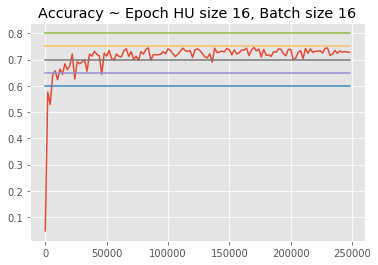

In [23]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.70)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.75)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.80)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(16,16))

In [24]:
# plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
# plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(16,16))

In [25]:
# trying 32 hidden units. rests are same premises as 10 units run
hwl_mlp_32 = mlp.MLP(training_X, training_y, 32)

# data loss is calcuated on training set
# accuracy is calculated on testing set
acclog,_ = hwl_mlp_32.train(batch_size=16, testset_X=testing_X, testset_y=testing_y)

Accuracy after epoch 0: 0.06025
Accuracy after epoch 2000: 0.62675
Accuracy after epoch 4000: 0.65475
Accuracy after epoch 6000: 0.68675
Accuracy after epoch 8000: 0.69375
Accuracy after epoch 10000: 0.729
Accuracy after epoch 12000: 0.74575
Accuracy after epoch 14000: 0.663
Accuracy after epoch 16000: 0.73975
Accuracy after epoch 18000: 0.756
Accuracy after epoch 20000: 0.744
Accuracy after epoch 22000: 0.71875
Accuracy after epoch 24000: 0.7445
Accuracy after epoch 26000: 0.761
Accuracy after epoch 28000: 0.77525
Accuracy after epoch 30000: 0.7515
Accuracy after epoch 32000: 0.716
Accuracy after epoch 34000: 0.765
Accuracy after epoch 36000: 0.75975
Accuracy after epoch 38000: 0.76375
Accuracy after epoch 40000: 0.76
Accuracy after epoch 42000: 0.778
Accuracy after epoch 44000: 0.76425
Accuracy after epoch 46000: 0.77575
Accuracy after epoch 48000: 0.76525
Accuracy after epoch 50000: 0.76275
Accuracy after epoch 52000: 0.74625
Accuracy after epoch 54000: 0.778
Accuracy after epoch 56

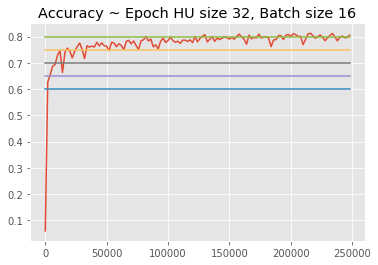

In [26]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.70)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.75)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.80)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(32,16))

## Ensemble
My strategy is to train enough models, obtaining models (weight) and use a clean empty MLP object to load each of the model and predict a outcome. The voting is an average of the outcome. Finally accuracy is reported as "ensembled".

In [27]:
import multiprocessing as mp

# Using half the cores as jobs
n_jobs = int(mp.cpu_count()/2)


names = ["model_{0}".format(i) for i in range(n_jobs)]

def performTraining(i):
    print('starting process', names[i])

    hwl_mlp_32 = mlp.MLP(training_X, training_y, 32, rand_seed=i) # random seed
    hwl_mlp_32.train(batch_size=16)
    hwl_mlp_32.save_model(names[i])
    
    print('done process', names[i])

with mp.Pool(n_jobs) as p:
    p.map(performTraining, range(n_jobs))

import time
time.sleep(2)

starting process model_0
starting process model_5
starting process model_1
starting process model_6
starting process model_3
starting process model_7
starting process model_11
starting process model_8
starting process model_10
starting process model_4
starting process model_2
starting process model_14
starting process model_15
starting process model_13
starting process model_9
starting process model_12
done process model_11
done process model_8
done process model_9
done process model_4
done process model_7
done process model_10
done process model_0
done process model_5
done process model_12
done process model_15
done process model_13
done process model_6
done process model_1
done process model_14
done process model_2
done process model_3


In [29]:

test_model = mlp.MLP(training_X, training_y, 32)

# naiive average predictions
ensemble = np.ndarray(shape=(testing_y.shape[0], testing_y.shape[1]))
for i, model in enumerate(names):
    test_model.load_model(model)
    predicted = test_model.predict(testing_X, naiive_ensemble=True)
#     print(predicted)
    ensemble += predicted
ensemble /= n_jobs
ensemble_prediction = np.argmax(ensemble, axis=1)
x_len = testing_X.shape[0]
correct_prediction = [
    target[ensemble_prediction[row_id]]
    for row_id, target in enumerate(testing_y)
]
acc = sum(correct_prediction) / x_len
print("Ensemble accuracy: {0}".format(acc))

Ensemble accuracy: 0.886


### Hooray!